In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:11<00:00, 250MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.6MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 85s 111ms/step - loss: 0.6855 - accuracy: 0.5948 - val_loss: 0.6270 - val_accuracy: 0.6502
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.6276 - accuracy: 0.6461 - val_loss: 0.6324 - val_accuracy: 0.6500
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6018 - accuracy: 0.6734 - val_loss: 0.6125 - val_accuracy: 0.6424
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5725 - accuracy: 0.7023 - val_loss: 0.5920 - val_accuracy: 0.6784
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5317 - accuracy: 0.7344 - val_loss: 0.7309 - val_accuracy: 0.6394
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4771 - accuracy: 0.7669 - val_loss: 0.6122 - val_accuracy: 0.6986
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4212 - accuracy: 0.8025 - val_loss: 0.6698 - val_ac

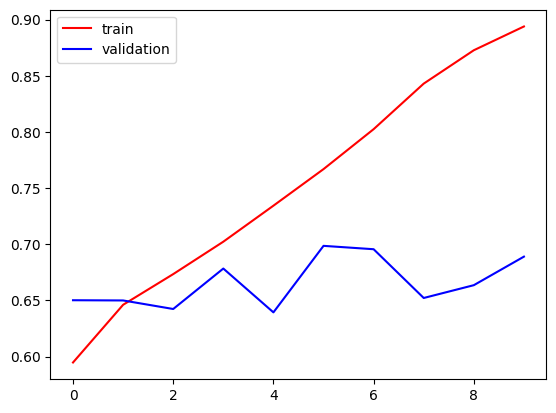

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

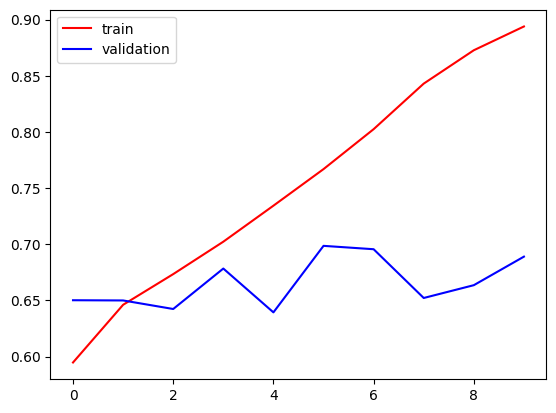

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

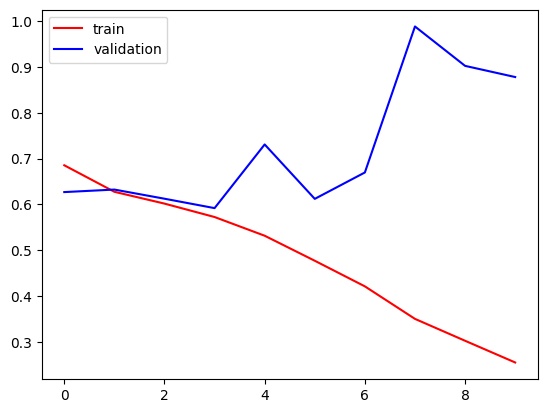

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

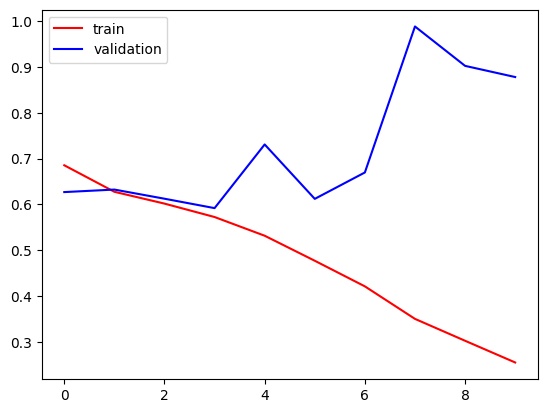

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
import cv2

In [23]:
test_img = cv2.imread('/content/cat1.jpg')

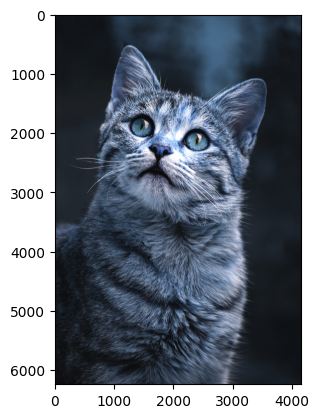

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(6240, 4160, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 300ms/step


array([[0.]], dtype=float32)

In [29]:
test_img1 = cv2.imread('/content/Cat_image_1.jpg')

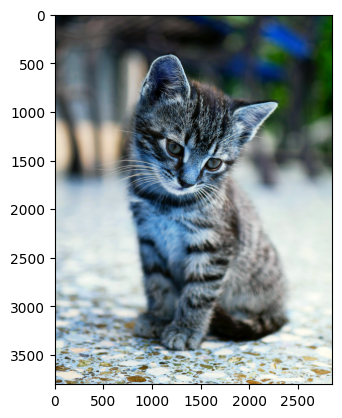

In [30]:
plt.imshow(test_img1)

In [31]:
test_img1.shape

(3803, 2853, 3)

In [32]:
test_img1 = cv2.resize(test_img,(256,256))

In [33]:
test_input1 = test_img1.reshape((1,256,256,3))

In [34]:
model.predict(test_input1)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)

In [35]:
test_img2= cv2.imread('/content/dog1.jpg')

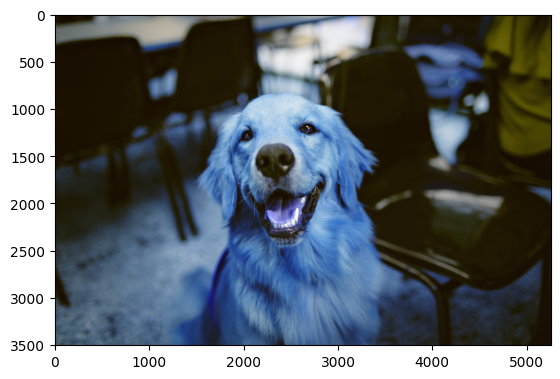

In [36]:
plt.imshow(test_img2)

In [37]:
test_img2.shape

(3505, 5257, 3)

In [38]:
test_img2 = cv2.resize(test_img2,(256,256))

In [39]:
test_input2 = test_img2.reshape((1,256,256,3))

In [40]:
model.predict(test_input2)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

In [41]:
test_img3= cv2.imread('/content/cat1.jpg')

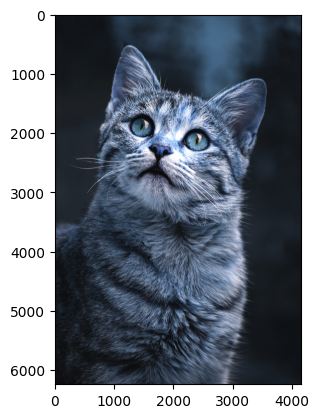

In [42]:
plt.imshow(test_img3)

In [43]:
test_img3.shape

(6240, 4160, 3)

In [44]:
test_img3 = cv2.resize(test_img3,(256,256))

In [45]:
test_input3 = test_img3.reshape((1,256,256,3))

In [46]:
model.predict(test_input3)

1/1 [==============================] - 0s 25ms/step


array([[0.]], dtype=float32)